rmse : 1.020317455704553

theta :
 [[0.05503072]
 [0.88353867]
 [0.06044537]]


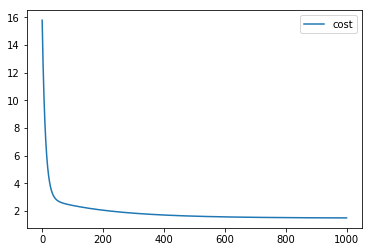

In [50]:
from sklearn.preprocessing import minmax_scale
import numpy as np
import matplotlib.pyplot as plt
my_data=np.loadtxt("C:/Users/Raghav Rastogi/Desktop/ml/machine-learning-ex1/ex1/ex1data2.txt", \
                delimiter=',')
mscaled=minmax_scale(my_data,feature_range=(0,10))
x1=mscaled[:,:-1]
y1=mscaled[:,-1]
N=len(x1)

x1=np.concatenate((np.ones((x1.shape[0],1)),x1),axis=1)
no_of_var=x1.shape[1]
theta=np.zeros((no_of_var,1))
iteration=1000
lrate=0.001
mcost=np.zeros(iteration)
for i in range(iteration):
    pred=np.matmul(x1,theta)#we cannot substract (47,1) and (47,) array result would be (47,47)
    pred=pred[:,0]
    #print(pred.shape)
    mcost[i]=(1/N)*sum((y1-pred)**2)
    #cost=(1/(2*m))*sum((ypred1-y)**2)
    for p in range(theta.shape[0]):
        theta[p]=theta[p]-(lrate/N)*sum(np.multiply((pred-y1),x1[:,p]))
        #it gives right results when we do pred-y1 and wrong when we do y1-pred
rmse=(sum((y1-pred)**2)/N)**.05
print("rmse :",rmse)
print("\ntheta :\n",theta)
plt.plot(np.arange(iteration),mcost,label='cost')
plt.legend(loc=1)
plt.show()